In [58]:
### Simple Exploratory data analysis (EDA)
# data file: preprocessed_data.pkl
# different groups numbers based on stance
# most frequent words in tweets by groups
# total tweets distribution
# follower distribution
# following distribution
# user created time distribution
# location distribution
# language distribution
# retweets count distribution
# political stance distribution
# hashtags distribution

In [33]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data visualization
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

In [94]:
data = pd.read_pickle("preprocessed_data.pkl")
data.head()

,userid,username,textid,location,language,tweetid,tweetcreatedts,retweetcount,hashtags,text,usercreatedts,following,followers,totaltweets,tags_splitted,tags_lower,pro_Russian,pro_Ukraine,Neutral,NodeType
0,1497277564200517635,GulambiLamver,0,गुलाबी_स्तान,en,1497433817086234624,2022-02-26 04:50:17,0,"[{'text': 'Ukraine', 'indices': [40, 48]}, {'t...",Coz barking is our fundamental right..\n\n#Ukr...,2022-02-25 18:29:39,4,0,2,"[Ukraine, UkraineUnderAttack, RussiaUkraineWar...","[ukraine, ukraineunderattack, russiaukrainewar...",False,True,True,pro_Ukraine
1,4832941924,Mari_Berbec,1,"Berlin, Germany",en,1497476520742309891,2022-02-26 07:39:58,0,"[{'text': 'putin', 'indices': [53, 59]}, {'tex...",@charlieweissr Socialism has nothing to do wit...,2016-01-21 13:57:12,921,224,2848,"[putin, trump]","[putin, trump]",False,False,True,Neutral
2,2314945207,Outspoken_Sam,2,"Texas, USA",en,1497066569263767555,2022-02-25 04:30:58,0,"[{'text': 'Ukraine', 'indices': [272, 280]}]",We're seeing repeated demonstrations of who Bi...,2014-01-28 05:46:59,1162,642,3869,[Ukraine],[ukraine],False,False,True,Neutral
3,2811043316,joncreed2,3,Nottinghamshire,und,1497308839401635845,2022-02-25 20:33:40,16,"[{'text': 'Ukraine', 'indices': [20, 28]}, {'t...",#Ukraine #Nottingham #nottinghamtogether #Stan...,2014-09-15 10:10:32,778,361,3960,"[Ukraine, Nottingham, nottinghamtogether, Stan...","[ukraine, nottingham, nottinghamtogether, stan...",False,True,True,pro_Ukraine
4,1239053406301335552,PChauhan_96,4,"Chamba, India",en,1497551063913619457,2022-02-26 12:36:11,276,"[{'text': 'Ukraine', 'indices': [34, 42]}]",That's a Leader ❣️ \n#Ukraine https://t.co/BpF...,2020-03-15 04:59:11,25,6,374,[Ukraine],[ukraine],False,False,True,Neutral


In [95]:
no_tag = data[data['tags_splitted']=="NA"]

proRussia = data[data['pro_Russian']==True]
proRussiaNoUkraine = data[(data['pro_Russian']==True) & (data['pro_Ukraine']==False)]

proUkraine = data[data['pro_Ukraine']==True]
proUkraineNoRussia = data[(data['pro_Russian']==False) & (data['pro_Ukraine']==True)]

non_R = data[data['pro_Russian']==False]

non = data[(data['pro_Russian']==False) & (data['pro_Ukraine']==False)]
both = data[(data['pro_Russian']==True) & (data['pro_Ukraine']==True)]

display(proRussia.shape)
display(proUkraine.shape)
display(non.shape)
display(both.shape)
display(proRussiaNoUkraine.shape)
display(proUkraineNoRussia.shape)
display(non_R.shape)

(631, 20)

(27170, 20)

(133899, 20)

(72, 20)

(559, 20)

(27098, 20)

(160997, 20)

In [96]:
node_columns = ["userid","username","usercreatedts","following","followers","totaltweets","pro_Russian","pro_Ukraine", "text"]
nodesBefore = data[node_columns][(data['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
nodesAfter = data[node_columns][(data['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]

difAll = round(len(nodesAfter) * 100 / len(nodesBefore), 2)
print("Tweets before Russia's block:", len(nodesBefore), "and after:", len(nodesAfter), "\nDifference:", difAll,"%", len(nodesAfter)-len(nodesBefore))

proRussianBefore = proRussia[node_columns][(proRussia['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
proRussianAfter = proRussia[node_columns][(proRussia['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]
difRus = round(len(proRussianAfter) * 100 / len(proRussianBefore),2)
print("Pro-Russian tweets before Russia's block:", len(proRussianBefore), "and after:", len(proRussianAfter), "\nDifference:", difRus,"%", len(proRussianAfter)-len(proRussianBefore))

ratioBefore = round(len(proRussianBefore)/len(nodesBefore), 4)
ratioAfter = round(len(proRussianAfter)/len(nodesAfter), 4)

print("Ratio pro-Russian:Total tweets before block:", ratioBefore, "and after:", ratioAfter)


proUkraineBefore = proUkraine[node_columns][(proUkraine['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
proUkraineAfter = proUkraine[node_columns][(proUkraine['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]
difUkr = round(len(proUkraineAfter) * 100 / len(proUkraineBefore),2)
print("Pro-Ukrainian tweets before Russia's block:", len(proUkraineBefore), "and after:", len(proUkraineAfter), "\nDifference:", difUkr,"%", len(proUkraineAfter)-len(proUkraineBefore))


bothBefore = both[node_columns][(both['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
bothAfter = both[node_columns][(both['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]
difBoth = round(len(bothAfter) * 100 / len(bothBefore),2)
print("Both tweets before Russia's block:", len(bothBefore), "and after:", len(bothAfter), "\nDifference:", difBoth,"%", len(bothAfter)-len(bothBefore))


nonBefore = non[node_columns][(non['tweetcreatedts'] < '2022-03-04 23:59:59+00:00')]
nonAfter = non[node_columns][(non['tweetcreatedts'] > '2022-03-04 23:59:59+00:00')]
difNon = round(len(nonAfter) * 100 / len(nonBefore),2)
print("Neutral tweets before Russia's block:", len(nonBefore), "and after:", len(nonAfter), "\nDifference:", difNon,"%", len(nonAfter)-len(nonBefore))

Tweets before Russia's block: 73333 and after: 88295 
Difference: 120.4 % 14962
Pro-Russian tweets before Russia's block: 431 and after: 200 
Difference: 46.4 % -231
Ratio pro-Russian:Total tweets before block: 0.0059 and after: 0.0023
Pro-Ukrainian tweets before Russia's block: 10413 and after: 16757 
Difference: 160.92 % 6344
Both tweets before Russia's block: 38 and after: 34 
Difference: 89.47 % -4
Neutral tweets before Russia's block: 62527 and after: 71372 
Difference: 114.15 % 8845


Word clouds

In [112]:
# FUNCTION FOR PRINTING MOST COMMON WORDS BY CATEGORY

def print_word_cloud(df):

    # print("Word cloud of most frequent words for the sentiment : {}".format(sentiment))

    temp_df = df
    print("Number of Rows : ", len(temp_df))

    corpus = ''
    for text in temp_df.text:
        text = str(text)
        corpus += text
        
    total = 0
    count = defaultdict(lambda: 0)
    for word in corpus.split(" "):
        total += 1
        count[word] += 1
        
    top20pairs = sorted(count.items(), key=lambda kv: kv[1], reverse=True)[:20]
    top20words = [i[0] for i in top20pairs]
    top20freq = [i[1] for i in top20pairs]
    print("Top 20 words:", top20pairs)
    
    xs = np.arange(len(top20words))
    width = 0.5

    fig = plt.figure(figsize=(10,6))                                                               
    ax = fig.gca()  #get current axes
    ax.bar(xs, top20freq, width, align='center')

    ax.set_xticks(xs)
    ax.set_xticklabels(top20words)
    plt.xticks(rotation=45)
    
    
    stopwords = set(STOPWORDS)
    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(max_font_size=50, max_words=50,stopwords=stopwords, background_color="white").generate(corpus)
    plt.figure(figsize = (12, 12), facecolor = None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [104]:
from collections import defaultdict
from bs4 import BeautifulSoup
import contractions
from nltk.corpus import stopwords
import nltk
import string, re

def denoise_text(text):
    # Strip html if any. For ex. removing <html>, <p> tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    # Replace contractions in the text. For ex. didn't -> did not
#     text = contractions.fix(text)
    return text

def remove_stopwords(words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word)
        return new_words

def tokenize(text):
        return nltk.word_tokenize(text)

def remove_punctuation(words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
                new_word = re.sub(r'[^\w\s]', '', word)
                if new_word == "https":
                    new_word = ''
                if new_word != '':
                        new_words.append(new_word)
        return new_words

def normalize_text(text):
    # text = text.apply(lambda x: denoise_text(x))
    text = tokenize(text)
    text = remove_stopwords(text)
    text = remove_punctuation(text)
    return text

Number of Rows :  431
Top 20 words: [('IStandWithPutin', 280), ('Russia', 160), ('RussiaUkraine', 132), ('istandwithrussia', 110), ('Ukraine', 85), ('Putin', 74), ('RussianUkrainianWar', 66), ('UkraineRussiaWar', 64), ('people', 53), ('war', 42), ('I', 40), ('Like', 40), ('Kyiv', 38), ('USA', 35), ('millions', 33), ('NATO', 33), ('US', 32), ('America', 32), ('Iraq', 32), ('West', 31)]


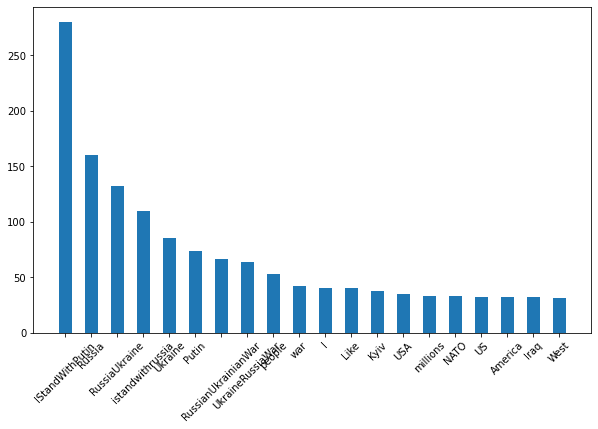

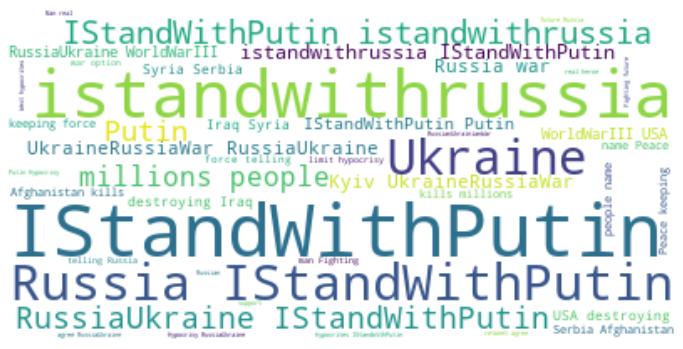

Number of Rows :  200
Top 20 words: [('IStandWithPutin', 137), ('Russia', 66), ('istandwithrussia', 65), ('Ukraine', 51), ('Putin', 43), ('RussianUkrainianWar', 26), ('UkraineRussianWar', 21), ('I', 19), ('Russian', 19), ('war', 16), ('world', 15), ('NATO', 14), ('US', 12), ('IStandWithRussia', 11), ('Twitter', 11), ('IStandWithUkraine', 11), ('accounts', 10), ('hashtag', 10), ('The', 10), ('UkraineRussiaWar', 10)]


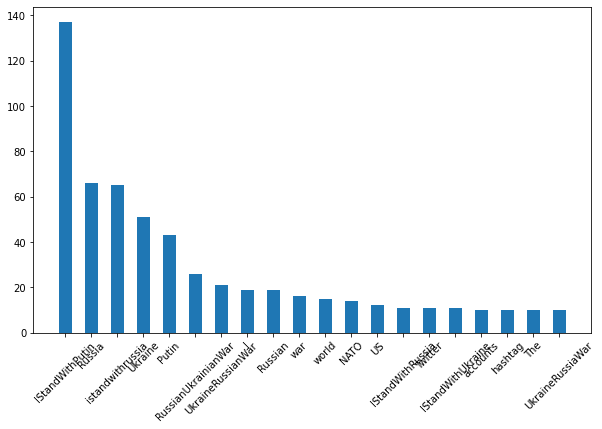

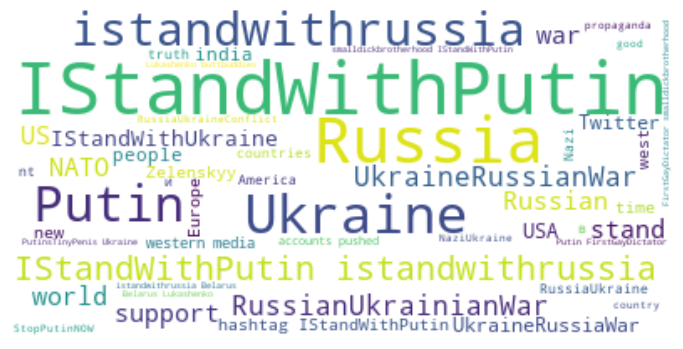

In [113]:
proRussianBefore["text"] = proRussianBefore["text"].apply(lambda x: ' '.join(normalize_text(x)))
proRussianAfter["text"] = proRussianAfter["text"].apply(lambda x: ' '.join(normalize_text(x)))

print_word_cloud(proRussianBefore)
print_word_cloud(proRussianAfter)

Number of Rows :  10413
Top 20 words: [('Ukraine', 6322), ('Putin', 3003), ('POTUS', 1919), ('Russia', 1807), ('Stop', 1685), ('provide', 1668), ('needs', 1654), ('defend', 1653), ('weapons', 1649), ('innocent', 1643), ('humanitarian', 1636), ('assistance', 1629), ('civilian', 1618), ('deaths', 1597), ('SafeAirliftUkraine', 1557), ('StandWithUkraine', 1448), ('UkraineUnderAttack', 1388), ('UkraineWar', 1232), ('StopPutin', 1212), ('NATO', 1158)]


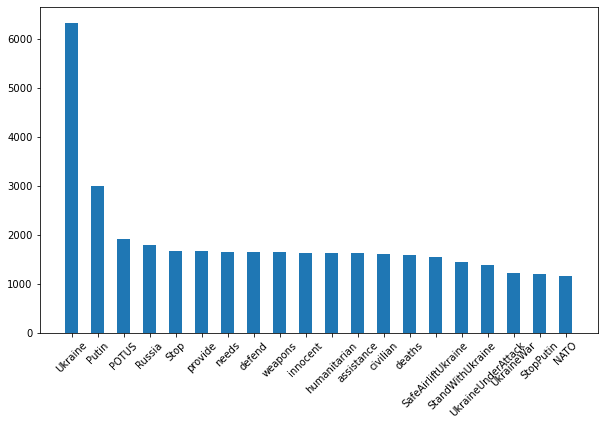

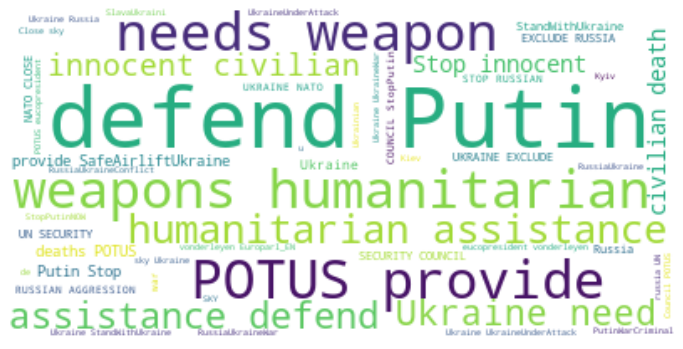

Number of Rows :  16757
Top 20 words: [('Ukraine', 8117), ('StandWithUkraine', 4832), ('Putin', 3574), ('Russia', 2202), ('UkraineWar', 1873), ('UkraineRussianWar', 1771), ('POTUS', 1653), ('Russian', 1653), ('provide', 1611), ('weapons', 1571), ('needs', 1478), ('innocent', 1465), ('Stop', 1454), ('humanitarian', 1439), ('SafeAirliftUkraine', 1437), ('civilian', 1418), ('defend', 1413), ('assistance', 1392), ('UkraineUnderAttack', 1378), ('deaths', 1359)]


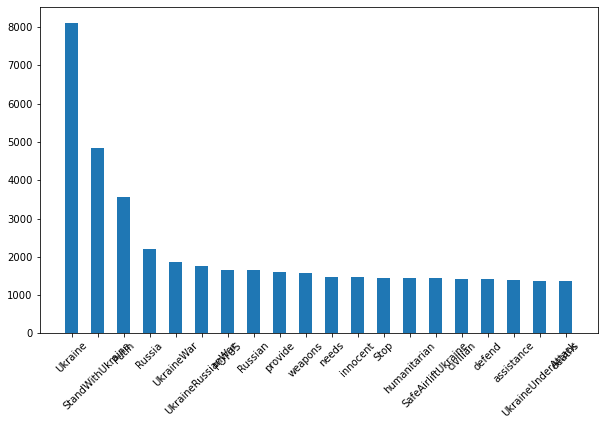

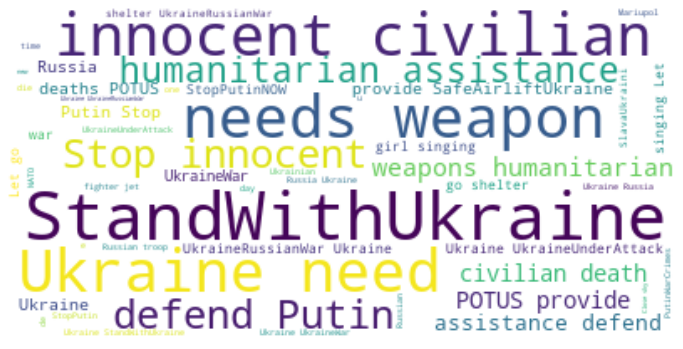

In [114]:
proUkraineBefore["text"] = proUkraineBefore["text"].apply(lambda x: ' '.join(normalize_text(x)))
proUkraineAfter["text"] = proUkraineAfter["text"].apply(lambda x: ' '.join(normalize_text(x)))

print_word_cloud(proUkraineBefore)
print_word_cloud(proUkraineAfter)

In [ ]:
non["text"] = non["text"].apply(lambda x: ' '.join(normalize_text(x)))

print_word_cloud(non)

1
9769.5
50107.60667087386
count    1.616280e+05
mean     5.010761e+04
std      1.280532e+05
min      0.000000e+00
25%      1.523000e+03
50%      9.769500e+03
75%      4.405700e+04
max      6.967834e+06
Name: totaltweets, dtype: float64
6967834 0


C:\Users\Namu\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


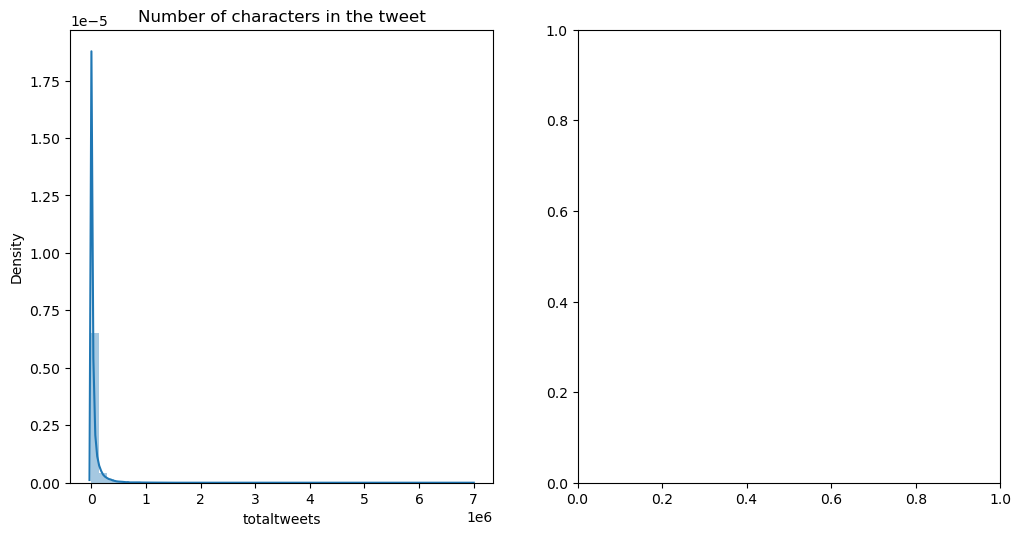

In [32]:
# total tweets distribution

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = data["totaltweets"]
print(st.mode(x))
print(st.median(x))
print(st.mean(x))
print(x.describe())
max_value = x.max()
min_value = x.min()
print(max_value, min_value)


fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(x, ax=ax1)
ax1.set_title('Number of characters in the tweet')
plt.show()

# plt.hist(data, bins=np.arange(data.min(), data.max()+1))
# plt.hist(x, bins=200) #doesn't show clearly, need to change
# plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

count    1.616280e+05
mean     1.332195e+04
std      2.939765e+05
min      0.000000e+00
25%      5.100000e+01
50%      2.820000e+02
75%      1.237000e+03
max      1.755703e+07
Name: followers, dtype: float64
0
282.0
13321.949606503824
17557028 0


[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

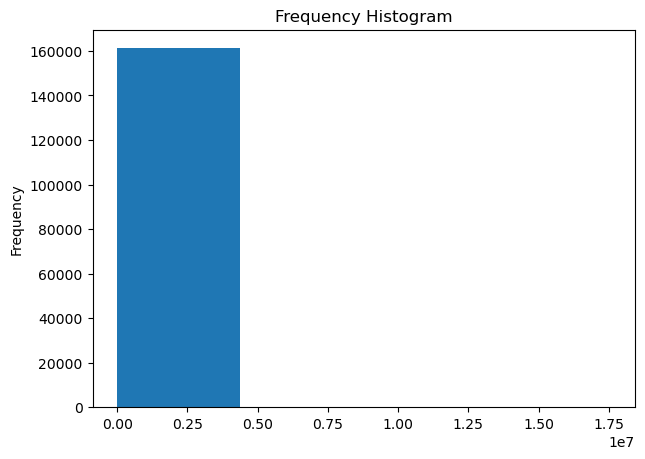

In [22]:
# follower distribution

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = data["followers"]
print(x.describe())

print(st.mode(x))
print(st.median(x))
print(st.mean(x))

max_value = x.max()
min_value = x.min()
print(max_value, min_value)


# plt.hist(data, bins=np.arange(data.min(), data.max()+1))
plt.hist(x, bins=10)  #doesn't show clearly, need to change
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

count    161628.000000
mean       1800.759701
std        9170.907634
min           0.000000
25%           1.000000
50%          25.000000
75%         301.000000
max      147637.000000
Name: retweetcount, dtype: float64
0
25.0
1800.7597012893805
147637 0


[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

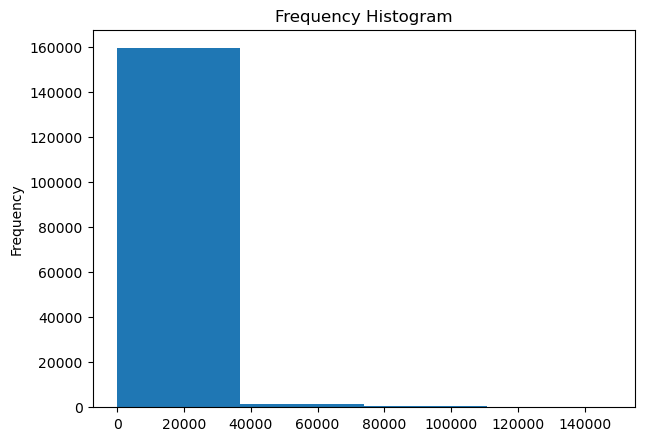

In [24]:
# retweetcount distribution

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = data["retweetcount"]
print(x.describe())

print(st.mode(x))
print(st.median(x))
print(st.mean(x))

max_value = x.max()
min_value = x.min()
print(max_value, min_value)


# plt.hist(data, bins=np.arange(data.min(), data.max()+1))
# plt.hist(x, bins=10) 
# plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

In [39]:
data["text"][data["retweetcount"] == 147637].to_list()

[".@ZelenskyyUa's tv address to the Russian (!) people might be the most moving speech that I've ever seen in my entire life. The whole world needs to see, understand and share this crucial Ukrainian message.\n#StandWithUkraine #Ukraine #Україна #Russia #Россия https://t.co/WoMOgqXTWX"]

In [23]:
data.columns

Index(['userid', 'username', 'textid', 'location', 'language', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'hashtags', 'text', 'usercreatedts',
       'following', 'followers', 'totaltweets', 'tags_splitted', 'tags_lower',
       'pro_Russian', 'pro_Ukraine'],
      dtype='object')

C:\Users\Namu\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namu\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


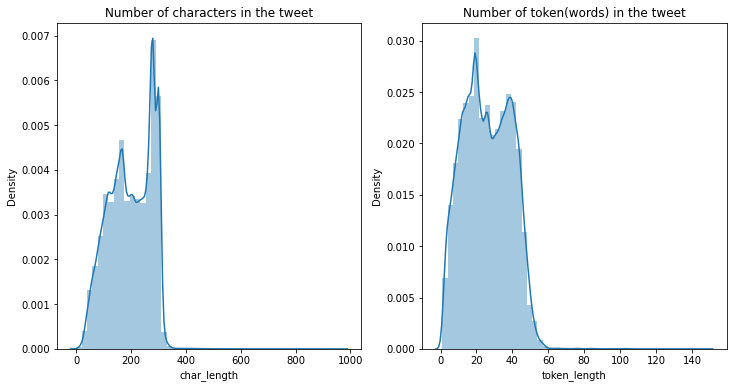

In [36]:
# Distribution of character length and token length overall
df = data["text"]
df['char_length'] = df['text'].apply(lambda x : len(x))
df['token_length'] = df['text'].apply(lambda x : len(x.split(" ")))

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(df['char_length'], ax=ax1)
sns.distplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()